## Problem Statement

![](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/Customer_Segmentation-thumbnail-1200x1200-90.jpg)

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

**Data Dictionary**

| **Variable**  | **Definition** |
| --- | --- |
| ID | UniqueID |
| Gender |  Gender of the customer |
| Ever_Married | Marital status of the customer |
| Age | Age of the customer |
| Graduated | Is the customer a graduate? |
| Profession | Profession of the customer |
| Work_Experience | Work Experience in years |
| Spending_Score | Spending score of the customer |
| Family_Size | Number of family members for the customer (including the customer) |
| Var_1 | Anonymised Category for the customer |
| Segmentation | (target) Customer Segment of the customer |

**Evaluation Metric**

The evaluation metric for this hackathon is Accuracy Score.


In [922]:
## Import necessary Libraries.

import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import os ## For connecting to machine to get path for reading/writing files.
from sklearn.model_selection import train_test_split ## For splitting data into train and validation.
from sklearn.preprocessing import LabelEncoder ## For label encoding(converting categorical values to label).
from sklearn.preprocessing import StandardScaler ## For scaling numeric columns.
from sklearn.tree import DecisionTreeClassifier,export_graphviz ## For decision tree model.
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report ## For metrics.
from sklearn.model_selection import  GridSearchCV ## For Grid search moel.
from sklearn.linear_model import LogisticRegression ## For Logistic model.
from sklearn.metrics import roc_curve ## For ROC curve.
from sklearn.naive_bayes import GaussianNB ## For NaiveBayes model.
from sklearn.neighbors import KNeighborsClassifier ## For KNN model.
from sklearn.ensemble import RandomForestClassifier ## For Random Forest model.
from sklearn.ensemble import BaggingClassifier ## For Bagging model.
from sklearn.ensemble import AdaBoostClassifier ## For AdaBoost model.
from sklearn.ensemble import GradientBoostingClassifier ## For GB model.
from xgboost.sklearn import XGBClassifier ## For XGB model.
from sklearn.svm import SVC ## For SVC model.
from keras.models import Sequential, Model ## For sequential model.
from keras.layers import Dense, Input ## For input,dense model.
from sklearn.linear_model import RidgeClassifier, Lasso ## For Ridge,Lasso Model.

In [2]:
## Get current working directory.
os.getcwd()

'D:\\Python\\Pratice\\Customer Segmentation'

In [924]:
## Set working directory.
os.chdir("D:\DataScience\Pratice\Customer Segmentation")
os.getcwd()

'D:\\DataScience\\Pratice\\Customer Segmentation'

In [925]:
## Load data sets.
train = pd.read_csv("train.csv",header='infer',sep=',')
test = pd.read_csv('test.csv',header='infer',sep=',')

In [926]:
## Check dimensions of train and test data.
print(train.shape)
print(test.shape)

(8068, 11)
(2627, 10)


In [927]:
## Check the first record of train data.
train.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [928]:
## Check the last record of train data.
train.tail(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [929]:
## Check the first record of test data.
test.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6


In [930]:
## Check the last record of test data.
test.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6


In [931]:
## Check the summary statistics of train data.
train.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [932]:
## Check the summary statistics of test data.
test.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,2627.000000,2627,2577,2627.000000,2603,2589,2358.000000,2627,2514.000000,2595
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6
freq,NaN,1424,1520,NaN,1602,802,NaN,1616,NaN,1672
mean,463433.918919,NaN,NaN,43.649791,NaN,NaN,2.552587,NaN,2.825378,NaN
std,2618.245698,NaN,NaN,16.967015,NaN,NaN,3.341094,NaN,1.551906,NaN
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN
25%,461162.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN
50%,463379.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN
75%,465696.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [933]:
## Check column names of train data.
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [934]:
## Check column names of test data.
test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [935]:
## Check column data types of train data.
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [936]:
## Check column data types of test data.
test.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [937]:
## Check index range for train data.
train.index

RangeIndex(start=0, stop=8068, step=1)

In [938]:
## Check index range for test data.
test.index

RangeIndex(start=0, stop=2627, step=1)

In [939]:
## Check NA values for train data.
train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [940]:
## Check NA values for test data.
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [941]:
## This method will return number of levels,null values,unique values,data types.

def observations(df):
    return(pd.DataFrame({'dtypes' : df.dtypes,
                         'levels' : [df[x].unique() for x in df.columns],
                         'null_values' : df.isnull().sum(),
                         'Unique Values': df.nunique()
                        }))

In [942]:
## Get train data statistics.
observations(train)

,dtypes,levels,null_values,Unique Values
ID,int64,"[462809, 462643, 466315, 461735, 462669, 46131...",0,8068
Gender,object,"[Male, Female]",0,2
Ever_Married,object,"[No, Yes, nan]",140,2
Age,int64,"[22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 7...",0,67
Graduated,object,"[No, Yes, nan]",78,2
Profession,object,"[Healthcare, Engineer, Lawyer, Entertainment, ...",124,9
Work_Experience,float64,"[1.0, nan, 0.0, 4.0, 9.0, 12.0, 3.0, 13.0, 5.0...",829,15
Spending_Score,object,"[Low, Average, High]",0,3
Family_Size,float64,"[4.0, 3.0, 1.0, 2.0, 6.0, nan, 5.0, 8.0, 7.0, ...",335,9
Var_1,object,"[Cat_4, Cat_6, Cat_7, Cat_3, Cat_1, Cat_2, nan...",76,7


In [943]:
## Get train data statistics.
observations(test)

,dtypes,levels,null_values,Unique Values
ID,int64,"[458989, 458994, 458996, 459000, 459001, 45900...",0,2627
Gender,object,"[Female, Male]",0,2
Ever_Married,object,"[Yes, No, nan]",50,2
Age,int64,"[36, 37, 69, 59, 19, 47, 61, 50, 22, 27, 18, 2...",0,67
Graduated,object,"[Yes, No, nan]",24,2
Profession,object,"[Engineer, Healthcare, nan, Executive, Marketi...",38,9
Work_Experience,float64,"[0.0, 8.0, 11.0, nan, 5.0, 1.0, 2.0, 9.0, 3.0,...",269,15
Spending_Score,object,"[Low, Average, High]",0,3
Family_Size,float64,"[1.0, 4.0, 2.0, 5.0, 3.0, 6.0, nan, 8.0, 7.0, ...",113,9
Var_1,object,"[Cat_6, Cat_4, Cat_3, nan, Cat_1, Cat_2, Cat_5...",32,7


In [944]:
## Below logic is used for checking special characters in numeric columns.

def specialCharcterVerification_NumCol(data):
    for col in data.select_dtypes(['int64','float64']).columns: 
        print('\n',col,'----->')
        for index in range(1,len(data)):
            try:
                skip=float(data.loc[index,col])
                skip=int(data.loc[index,col])
            except ValueError :
                if(str(data.loc[index,col]) != 'nan'):
                    print(index,data.loc[index,col])

In [945]:
## Check special charcters for train data numeric columns.
specialCharcterVerification_NumCol(train)


 ID ----->

 Age ----->

 Work_Experience ----->

 Family_Size ----->


In [946]:
## Check special charcters for test data numeric columns.
specialCharcterVerification_NumCol(test)


 ID ----->

 Age ----->

 Work_Experience ----->

 Family_Size ----->


In [947]:
## Check special characters for categorical columns.
def specialCharcterVerification_CatCol(data):
    for col in data.select_dtypes(['category','object']).columns:
        print('\n',col,'----->')
        for index in range(1,len(data)):
            if  str(data.loc[index,col]).isdigit() or str(data.loc[index,col]) =='nan' or data.loc[index,col].isalpha() or data.loc[index,col].isalnum():
                skip = True
            else:
                print("Index ",index,"\tSpecial Character ",data.loc[index,col]) 

In [948]:
## calculate variance column wise.
def variance(x):
        return(pd.DataFrame({'Datatype' : x.dtypes,
                            'Variance': [round(x[i].var()) for i in x] }))

In [949]:
## Get variance for train data numeric columns.
variance(train.select_dtypes(['int64','float64']))

,Datatype,Variance
ID,int64,6736004
Age,int64,279
Work_Experience,float64,12
Family_Size,float64,2


In [950]:
## Get variance for test data numeric columns.
variance(test.select_dtypes(['int64','float64']))

,Datatype,Variance
ID,int64,6855211
Age,int64,288
Work_Experience,float64,11
Family_Size,float64,2


In [951]:
## Check for corrlation between numeric columns of train data.
train[train.select_dtypes(['int64','float64']).columns].corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


In [952]:
## Check for corrlation between numeric columns of test data.
test[test.select_dtypes(['int64','float64']).columns].corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.022940,-0.025445,0.020830
Age,-0.022940,1.000000,-0.186238,-0.285237
Work_Experience,-0.025445,-0.186238,1.000000,-0.071253
Family_Size,0.020830,-0.285237,-0.071253,1.000000


In [953]:
## Get missing percentage of NA values.
def missingValuesPercentage(Data):
    missing_values = (Data.isna().sum() /len(Data)).round(4) * 100 
    print(missing_values.sort_values(ascending = False))

In [954]:
## Get NA values count in percentage for train data.
missingValuesPercentage(train)

Work_Experience    10.28
Family_Size         4.15
Ever_Married        1.74
Profession          1.54
Graduated           0.97
Var_1               0.94
Segmentation        0.00
Spending_Score      0.00
Age                 0.00
Gender              0.00
ID                  0.00
dtype: float64


In [955]:
## Get NA values count in percentage for test data.
missingValuesPercentage(test)

Work_Experience    10.24
Family_Size         4.30
Ever_Married        1.90
Profession          1.45
Var_1               1.22
Graduated           0.91
Spending_Score      0.00
Age                 0.00
Gender              0.00
ID                  0.00
dtype: float64


In [956]:
## Drop duplicate records for train data.
train = train.drop_duplicates()

In [957]:
## Drop duplicate records for test data.
test = test.drop_duplicates()

In [958]:
## Data type conversion(from object to category).
def dataTypeConversion(cols,data):
    for col in cols:
        data[col] = data[col].astype('category')
    return data

In [959]:
## Convert object columns into categrogy columns for train data.
cat_columns = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']
train = dataTypeConversion(cat_columns,train)

In [960]:
## Convert object columns into categrogy columns for test data.
cat_columns = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
test = dataTypeConversion(cat_columns,test)

In [961]:
## Check train data columns data types after conversion.
train.dtypes

ID                    int64
Gender             category
Ever_Married       category
Age                   int64
Graduated          category
Profession         category
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1              category
Segmentation       category
dtype: object

In [962]:
## Check test data columns data types after conversion.
test.dtypes

ID                    int64
Gender             category
Ever_Married       category
Age                   int64
Graduated          category
Profession         category
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1              category
dtype: object

In [963]:
## Check special charcters for train data category columns.
specialCharcterVerification_CatCol(train.drop('Var_1',axis=1))


 Gender ----->

 Ever_Married ----->

 Graduated ----->

 Profession ----->

 Spending_Score ----->

 Segmentation ----->


In [964]:
## Check special charcters for test data category columns.
specialCharcterVerification_CatCol(test.drop('Var_1',axis=1))


 Gender ----->

 Ever_Married ----->

 Graduated ----->

 Profession ----->

 Spending_Score ----->


In [965]:
## Data type conversion(from float to int).
def numDataTypeConversion(cols,data):
    for col in cols:
        data[col] = data[col].astype('int32')
    return data

In [966]:
## Float data types columns.
num_cols = ['Age','Work_Experience','Family_Size']

In [967]:
## Set ID as index to train and test.
train.set_index('ID',inplace=True)
test.set_index('ID',inplace=True)

In [968]:
## Store train data features into train_data.
train_data = train.drop('Segmentation', axis=1)

In [969]:
## Store train data Segmentation column into y.
y = train['Segmentation']

In [970]:
## Split the train data into  train and validation(80:20).
X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.2,random_state =1234)

In [971]:
## Check first record of train data.
X_train.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
461876,Male,No,32,Yes,Entertainment,9.0,Low,2.0,Cat_6


In [972]:
## Chech last record of train data.
X_train.tail(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
463096,Female,No,33,Yes,Doctor,NaN,Low,3.0,Cat_6


In [973]:
## Check first record of validation data.
X_test.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [974]:
## Check last record of validation data.
X_test.tail(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
467748,Male,Yes,38,Yes,Executive,NaN,High,4.0,Cat_6


In [975]:
############################################ Impute NA values ###############################################################

In [976]:
## Check NA values for train data before imputing.
X_train.isna().sum()

Gender               0
Ever_Married       113
Age                  0
Graduated           60
Profession          99
Work_Experience    648
Spending_Score       0
Family_Size        275
Var_1               63
dtype: int64

In [977]:
## Check NA values for validation data before imputing.
X_test.isna().sum()

Gender               0
Ever_Married        27
Age                  0
Graduated           18
Profession          25
Work_Experience    181
Spending_Score       0
Family_Size         60
Var_1               13
dtype: int64

In [978]:
## Check NA values for test data before imputing.
test.isna().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [979]:
X_train.dtypes

Gender             category
Ever_Married       category
Age                   int64
Graduated          category
Profession         category
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1              category
dtype: object

In [980]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_train['Ever_Married'] = X_train['Ever_Married'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Ever_Married column of train data.
X_train['Ever_Married'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [981]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_test['Ever_Married'] = X_test['Ever_Married'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Ever_Married column of validation data.
X_test['Ever_Married'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [982]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
test['Ever_Married'] = test['Ever_Married'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Ever_Married column of test data.
test['Ever_Married'].fillna('Unknown',inplace=True)

In [983]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_train['Gender'] = X_train['Gender'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Gender column of train data.
X_train['Gender'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [984]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_test['Gender'] = X_test['Gender'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Gender column of validation data.
X_test['Gender'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [985]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
test['Gender'] = test['Gender'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Gender column of test data.
test['Gender'].fillna('Unknown',inplace=True)

In [986]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_train['Graduated'] = X_train['Graduated'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Graduated column of train data.
X_train['Graduated'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [987]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_test['Graduated'] = X_test['Graduated'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Graduated column of validation data.
X_test['Graduated'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [988]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
test['Graduated'] = test['Graduated'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Graduated column of test data.
test['Graduated'].fillna('Unknown',inplace=True)

In [989]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_train['Profession'] = X_train['Profession'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Profession column of train data.
X_train['Profession'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [990]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_test['Profession'] = X_test['Profession'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Profession column of validation data.
X_test['Profession'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [991]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
test['Profession'] = test['Profession'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Profession column of test data.
test['Profession'].fillna('Unknown',inplace=True)

In [992]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_train['Var_1'] = X_train['Var_1'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Var_1 column of train data.
X_train['Var_1'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [993]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
X_test['Var_1'] = X_test['Var_1'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Var_1 column of validation data.
X_test['Var_1'].fillna('Unknown',inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [994]:
##  fillna requires a value that already exists as a category for categorical columns so that's why adding Unkown level.
test['Var_1'] = test['Var_1'].cat.add_categories('Unknown')

## Fill NA values with Unknown for Var_1 column of test data.
test['Var_1'].fillna('Unknown',inplace=True)

In [995]:
## Impute NA values for Work_Experience column of train data.
X_train['Work_Experience'].fillna(value=0,inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [996]:
## Impute NA values for Work_Experience column of validation data.
X_test['Work_Experience'].fillna(value=0,inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [997]:
## Impute NA values for Work_Experience column of test data.
test['Work_Experience'].fillna(value=0,inplace=True)

In [998]:
## Impute NA values for Family_Size column of train data.
X_train['Family_Size'].fillna(value=0,inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [999]:
## Impute NA values for Family_Size column of validation data.
X_test['Family_Size'].fillna(value=0,inplace=True)

C:\Users\nagar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [1000]:
## Impute NA values for Family_Size column of test data.
test['Family_Size'].fillna(value=0,inplace=True)

In [1001]:
## Check NA values for train data after imputaion.
X_train.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [1002]:
## Check NA values for validation data after imputaion.
X_test.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [1003]:
## Check NA values for test data after imputaion.
test.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [1004]:
## Convert float data type to int for train data columns.
X_train = numDataTypeConversion(num_cols,X_train)
X_train.dtypes

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Gender             category
Ever_Married       category
Age                   int32
Graduated          category
Profession         category
Work_Experience       int32
Spending_Score     category
Family_Size           int32
Var_1              category
dtype: object

In [1005]:
## Convert float data type to int for validation data columns.
X_test = numDataTypeConversion(num_cols,X_test)
X_test.dtypes

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Gender             category
Ever_Married       category
Age                   int32
Graduated          category
Profession         category
Work_Experience       int32
Spending_Score     category
Family_Size           int32
Var_1              category
dtype: object

In [1006]:
## Convert float data type to int for test data columns.
test = numDataTypeConversion(num_cols,test)
test.dtypes

Gender             category
Ever_Married       category
Age                   int32
Graduated          category
Profession         category
Work_Experience       int32
Spending_Score     category
Family_Size           int32
Var_1              category
dtype: object

In [1007]:
## Do label encoding(For converting category column values into numeric values).

le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_graduate = LabelEncoder()
le_profession = LabelEncoder()
le_spendinng_score = LabelEncoder()
le_var_1 = LabelEncoder()

le_segmentation = LabelEncoder()

In [1008]:
## Do label encoding for trian data. 
X_train['Gender'] = le_gender.fit_transform(X_train['Gender'])
X_train['Ever_Married'] = le_ever_married.fit_transform(X_train['Ever_Married'])
X_train['Graduated'] = le_graduate.fit_transform(X_train['Graduated'])
X_train['Profession'] = le_profession.fit_transform(X_train['Profession'])
X_train['Spending_Score'] = le_spendinng_score.fit_transform(X_train['Spending_Score'])
X_train['Var_1'] = le_var_1.fit_transform(X_train['Var_1'])

y_train = le_segmentation.fit_transform(y_train)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [1009]:
## Do label encoding for validation data. 
X_test['Gender'] = le_gender.transform(X_test['Gender'])
X_test['Ever_Married'] = le_ever_married.transform(X_test['Ever_Married'])
X_test['Graduated'] = le_graduate.transform(X_test['Graduated'])
X_test['Profession'] = le_profession.transform(X_test['Profession'])
X_test['Spending_Score'] = le_spendinng_score.transform(X_test['Spending_Score'])
X_test['Var_1'] = le_var_1.transform(X_test['Var_1'])

y_test = le_segmentation.transform(y_test)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [1010]:
## Do label encoding for test data. 
test['Gender'] = le_gender.transform(test['Gender'])
test['Ever_Married'] = le_ever_married.transform(test['Ever_Married'])
test['Graduated'] = le_graduate.transform(test['Graduated'])
test['Profession'] = le_profession.transform(test['Profession'])
test['Spending_Score'] = le_spendinng_score.transform(test['Spending_Score'])
test['Var_1'] = le_var_1.transform(test['Var_1'])

In [1011]:
########################################## Build Different Models #############################################################

In [1012]:
########################################## XGB Classifier #####################################################################

In [1013]:
## Model Building with Grid Search.
xgb = XGBClassifier() ## Instantiate XGBClassifier model.

optimization_dict = {'max_depth': [2,3,4,5,6,7,10,15], ## Trying with different max_depth,n_estimators to find best model.
                      'n_estimators': [50,60,70,80,90,100,150,200]} 

## Build best model with Grid Search params.
model = GridSearchCV(xgb, ## XGB model.
                     optimization_dict, ## Dictory with different max_depth,n_estimators.
                     scoring='accuracy', ## Metric on which we are interested.
                     verbose=1, ## For messaging purpose.
                     n_jobs=-1) ## Number of jobs to run in parallel. ''-1' means use all processors.

%time model.fit(X_train, y_train) ## Fit a model.
print(model.best_score_) ## Display best score calues.
print(model.best_params_) ## Display best parameters.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.9min finished


Wall time: 2min 58s
0.5395114657827896
{'max_depth': 3, 'n_estimators': 200}


In [1014]:
## Fit a model with best params which we found after grid search CV (above code).
model = XGBClassifier(max_depth=10,          ## Depth of the tree.
                      n_estimators=200,      ## Number of trees.
                      learning_rate = 0.001, ## Learning rate.
                      booster ='gbtree',     ## Booster type.
                      random_state=1234)     ## Seed value.
%time model.fit(X_train, y_train)

Wall time: 17.1 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1015]:
## Get the predictions on train data.
train_pred = model.predict(X_train)

In [1016]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.676169817167648


In [1017]:
## Get the predictions on validation data.
validation_pred = model.predict(X_test)

In [1018]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,validation_pred))

Validation Accuracy : 0.5037174721189591


In [1019]:
## Get the confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[1037  208  143  208]
 [ 263  732  337  139]
 [ 133  178 1095  157]
 [ 200   94   30 1500]]


In [1020]:
## Get the confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, validation_pred)
print(confusion_matrix_test)

[[160  91  42  83]
 [110 116 109  52]
 [ 61  68 221  57]
 [ 82  28  18 316]]


In [1021]:
## Display metrics of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1596
           1       0.60      0.50      0.55      1471
           2       0.68      0.70      0.69      1563
           3       0.75      0.82      0.78      1824

    accuracy                           0.68      6454
   macro avg       0.67      0.67      0.67      6454
weighted avg       0.67      0.68      0.67      6454



In [1022]:
## Display metrics of validation data.
print(classification_report(y_true=y_test,y_pred=validation_pred))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       376
           1       0.38      0.30      0.34       387
           2       0.57      0.54      0.55       407
           3       0.62      0.71      0.66       444

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.50      0.50      0.50      1614



In [1023]:
## Copy test data into temp.
temp = test.copy()

In [1024]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1025]:
## Display prediction values.
y_pred

array([0, 1, 0, ..., 0, 2, 3])

In [1026]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1027]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1028]:
## Copy ID , Segmentation columns from test to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1029]:
## Get each value count of Segmentation column.
to_submit.Segmentation.value_counts()

D    818
A    680
C    599
B    530
Name: Segmentation, dtype: int64

In [1030]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1031]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1032]:
## Store to_submit data into a csv file with name XGB. 
to_submit.to_csv('XGB.csv',index = False)

In [1033]:
################################################## Decision Tree ###############################################################

In [1034]:
## Instantiate decision tree and  fit a model.
clf = DecisionTreeClassifier(max_depth=8) ##  Depth of the tree.
clf = clf.fit(X_train, y_train)

In [1035]:
## Get GraphViz path.
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [1036]:
## Import Graphic libraries.
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [1037]:
## Plot the tree hierarchy.
def plottree(m1):
    labels=X_train.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['A', 'B','C','D'] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

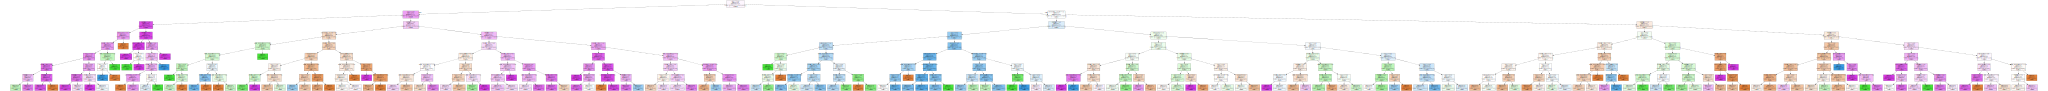

In [1038]:
## Plot hierarchy of train data.
plottree(clf)

In [1039]:
## Getting the predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [1040]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.58537341183762


In [1041]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.49070631970260226


In [1042]:
## Get confusion matrix for train and validation and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[ 774  328  176  318]
 [ 238  656  391  186]
 [ 146  269  942  206]
 [ 274  103   41 1406]]
[[130 111  44  91]
 [ 84 128 122  53]
 [ 47  79 222  59]
 [ 92  21  19 312]]


In [1043]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1596
           1       0.48      0.45      0.46      1471
           2       0.61      0.60      0.61      1563
           3       0.66      0.77      0.71      1824

    accuracy                           0.59      6454
   macro avg       0.57      0.58      0.57      6454
weighted avg       0.58      0.59      0.58      6454



In [1044]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36       376
           1       0.38      0.33      0.35       387
           2       0.55      0.55      0.55       407
           3       0.61      0.70      0.65       444

    accuracy                           0.49      1614
   macro avg       0.47      0.48      0.48      1614
weighted avg       0.48      0.49      0.48      1614



In [1045]:
## Prepares a dictionary for parameters of grid search model.
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [1046]:
## Instantiate model andd fit it.
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,         ## Decision tree model.
                   param_grid, ## Dictionary parameters for grid search.
                   cv=10)      ## Number of folds for cross validation.
%time clf.fit(X_train, y_train)

Wall time: 47.6 s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [1047]:
## Get best parameters from grid search.
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [1048]:
## Instantiate decision tree with best parameters and  fit a model.
clf = DecisionTreeClassifier(criterion = 'gini',    ## The function to measure the quality of a split
                             max_leaf_nodes = 5,   ## Maximum number of leaf nodes.
                             min_samples_leaf = 1,  ## Minumn samples in leaf nodes.
                             min_samples_split = 2, ## Minum samples for a split.
                             max_depth=8)           ##  Depth of the tree.
clf = clf.fit(X_train, y_train)

In [1049]:
## Get predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [1050]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.48342113418035326


In [1051]:
## Display accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.4745972738537794


In [1052]:
## Get confusion matrix for train and validation and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[ 756  318   84  438]
 [ 528  488  237  218]
 [ 304  406  607  246]
 [ 402  139   14 1269]]
[[179  78  21  98]
 [134 124  66  63]
 [ 80 107 161  59]
 [114  25   3 302]]


In [1053]:
## Display metrics for train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      1596
           1       0.36      0.33      0.35      1471
           2       0.64      0.39      0.48      1563
           3       0.58      0.70      0.64      1824

    accuracy                           0.48      6454
   macro avg       0.49      0.47      0.47      6454
weighted avg       0.50      0.48      0.48      6454



In [1054]:
## Display metrics for validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.35      0.48      0.41       376
           1       0.37      0.32      0.34       387
           2       0.64      0.40      0.49       407
           3       0.58      0.68      0.63       444

    accuracy                           0.47      1614
   macro avg       0.49      0.47      0.47      1614
weighted avg       0.49      0.47      0.47      1614



In [1055]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1056]:
## Copy test data into temp.
temp = test.copy()

In [1057]:
## Display prediction values.
y_pred

array([0, 1, 0, ..., 0, 2, 3])

In [1058]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1059]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1060]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1061]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    818
A    680
C    599
B    530
Name: Segmentation, dtype: int64

In [1062]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1063]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1064]:
## Store to_submit into csv file with name DecisionTree. 
to_submit.to_csv('DecisionTree.csv',index = False)

In [1065]:
############################################# Naive Bayes #####################################################################

In [1066]:
## Instantiate naive bayes model.
model = GaussianNB()

In [1067]:
## Fit a model.
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1068]:
## Get predictions on train data.
predict_train = model.predict(X_train)

In [1069]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,predict_train))

Train Accuracy : 0.4835760768515649


In [1070]:
## Get predictions on validation data.
validation_pred = model.predict(X_test)

In [1071]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,validation_pred))

Validation Accuracy : 0.4826517967781908


In [1072]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, predict_train)
print(confusion_matrix_train)

[[ 555  176  378  487]
 [ 374  234  653  210]
 [ 188  152  984  239]
 [ 265  116   95 1348]]


In [1073]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, validation_pred)
print(confusion_matrix_test)

[[124  58  83 111]
 [ 95  66 164  62]
 [ 45  35 263  64]
 [ 66  27  25 326]]


In [1074]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      1596
           1       0.36      0.33      0.35      1471
           2       0.64      0.39      0.48      1563
           3       0.58      0.70      0.64      1824

    accuracy                           0.48      6454
   macro avg       0.49      0.47      0.47      6454
weighted avg       0.50      0.48      0.48      6454



In [1075]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=validation_pred))

              precision    recall  f1-score   support

           0       0.38      0.33      0.35       376
           1       0.35      0.17      0.23       387
           2       0.49      0.65      0.56       407
           3       0.58      0.73      0.65       444

    accuracy                           0.48      1614
   macro avg       0.45      0.47      0.45      1614
weighted avg       0.46      0.48      0.46      1614



In [1076]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1077]:
## Copy test data into temp.
temp = test.copy()

In [1078]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1079]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1080]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1081]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1082]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1083]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1084]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1085]:
## Store to_submit data into a csv file with name NaiveBayes. 
to_submit.to_csv('NaiveBayes.csv',index = False)

In [1086]:
################################################## KNN ######################################################################

In [1087]:
## Instantiate KNN model.
knn = KNeighborsClassifier(algorithm = 'brute',  ## Algorithm used to compute the nearest neighbors.
                           n_neighbors = 3,      ## Number of neighbors.
                           metric = "euclidean") ## The distance metric to use for the tree.

In [1088]:
## Fit a model.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1089]:
## Get predictions on train data.
train_pred = knn.predict(X_train)

In [1090]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.682367524016114


In [1091]:
## Get predictions on validation data.
test_pred = knn.predict(X_test)

In [1092]:
## Display accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.46158612143742256


In [1093]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[1266  132   91  107]
 [ 374  846  182   69]
 [ 306  199  995   63]
 [ 364  126   37 1297]]


In [1094]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[203  74  40  59]
 [158 114  92  23]
 [100  93 184  30]
 [129  40  31 244]]


In [1095]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1596
           1       0.65      0.58      0.61      1471
           2       0.76      0.64      0.69      1563
           3       0.84      0.71      0.77      1824

    accuracy                           0.68      6454
   macro avg       0.70      0.68      0.68      6454
weighted avg       0.71      0.68      0.69      6454



In [1096]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.34      0.54      0.42       376
           1       0.36      0.29      0.32       387
           2       0.53      0.45      0.49       407
           3       0.69      0.55      0.61       444

    accuracy                           0.46      1614
   macro avg       0.48      0.46      0.46      1614
weighted avg       0.49      0.46      0.47      1614



In [1097]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1098]:
## Copy test data into temp.
temp = test.copy()

In [1099]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1100]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1101]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1102]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1103]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1104]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1105]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1106]:
## Store to_submit into csv file with name KNN. 
to_submit.to_csv('KNN.csv',index = False)

In [1107]:
################################################ Random Forest ################################################################

In [1108]:
## Instantiate random forest model.
rc = RandomForestClassifier(n_estimators=30, ## Number of trees.
                            max_depth=10,    ## Tree depth.
                            n_jobs=-1)       ## To run the jobs parallel(uses all processors to complete the job).

In [1109]:
## Fit a model.
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [1110]:
## Get predictions on train and validation data.
train_pred = rc.predict(X_train)
test_pred = rc.predict(X_test)

In [1111]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.7017353579175705


In [1112]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.5353159851301115


In [1113]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[1123  160  137  176]
 [ 221  777  326  147]
 [ 119  194 1074  176]
 [ 177   70   22 1555]]


In [1114]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[170  75  42  89]
 [ 91 136 105  55]
 [ 45  73 232  57]
 [ 88  20  10 326]]


In [1115]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1596
           1       0.65      0.53      0.58      1471
           2       0.69      0.69      0.69      1563
           3       0.76      0.85      0.80      1824

    accuracy                           0.70      6454
   macro avg       0.69      0.69      0.69      6454
weighted avg       0.70      0.70      0.70      6454



In [1116]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.43      0.45      0.44       376
           1       0.45      0.35      0.39       387
           2       0.60      0.57      0.58       407
           3       0.62      0.73      0.67       444

    accuracy                           0.54      1614
   macro avg       0.52      0.53      0.52      1614
weighted avg       0.53      0.54      0.53      1614



In [1117]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1118]:
## Copy test data into temp.
temp = test.copy()

In [1119]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

## Reset index of temp data.
temp.reset_index(inplace=True)

## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1120]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1121]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1122]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1123]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1124]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1125]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1126]:
## Store to_submit into csv file with name RandomForest. 
to_submit.to_csv('RandomForest.csv',index = False)

In [1127]:
######################################################### Bagging ##############################################################

In [1128]:
## Instantiate Bagging model and fit it.
clf = BaggingClassifier(n_estimators=200) ## Number of trees.
clf.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=200,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [1129]:
## Get predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [1130]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.9614192748682987


In [1131]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.48141263940520446


In [1132]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[1537   29   20   10]
 [  23 1385   52   11]
 [  16   37 1491   19]
 [  12    8   12 1792]]


In [1133]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[148  96  49  83]
 [ 91 141 103  52]
 [ 63 101 195  48]
 [ 86  38  27 293]]


In [1134]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1596
           1       0.95      0.94      0.95      1471
           2       0.95      0.95      0.95      1563
           3       0.98      0.98      0.98      1824

    accuracy                           0.96      6454
   macro avg       0.96      0.96      0.96      6454
weighted avg       0.96      0.96      0.96      6454



In [1135]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39       376
           1       0.38      0.36      0.37       387
           2       0.52      0.48      0.50       407
           3       0.62      0.66      0.64       444

    accuracy                           0.48      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.48      0.48      0.48      1614



In [1136]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1137]:
## Copy test data into temp.
temp = test.copy()

In [1138]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1139]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1140]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1141]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1142]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1143]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1144]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1145]:
## Store to_submit data into a csv file with name Bagging. 
to_submit.to_csv('Bagging.csv',index = False)

In [1146]:
################################################### AdaBoost ##################################################################

In [1147]:
## Instantiate AdaBoost model and fit it.
Adaboost_model = AdaBoostClassifier(n_estimators=50, ## Number of trees.
                                    learning_rate=1) ## Learning rate.
%time Adaboost_model.fit(X_train, y_train)

Wall time: 318 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [1148]:
## Get predictions on train and validation data.
train_pred = Adaboost_model.predict(X_train)
test_pred = Adaboost_model.predict(X_test)

In [1149]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.5300588782150605


In [1150]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.4993804213135068


In [1151]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[ 774  212  292  318]
 [ 406  418  478  169]
 [ 182  255  916  210]
 [ 324  104   83 1313]]


In [1152]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[165  71  62  78]
 [112  91 135  49]
 [ 55  67 231  54]
 [ 86  19  20 319]]


In [1153]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1596
           1       0.42      0.28      0.34      1471
           2       0.52      0.59      0.55      1563
           3       0.65      0.72      0.68      1824

    accuracy                           0.53      6454
   macro avg       0.51      0.52      0.51      6454
weighted avg       0.52      0.53      0.52      6454



In [1154]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.39      0.44      0.42       376
           1       0.37      0.24      0.29       387
           2       0.52      0.57      0.54       407
           3       0.64      0.72      0.68       444

    accuracy                           0.50      1614
   macro avg       0.48      0.49      0.48      1614
weighted avg       0.49      0.50      0.49      1614



In [1155]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1156]:
## Copy test data into temp.
temp = test.copy()

In [1157]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1158]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1159]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1160]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1161]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1162]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1163]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1164]:
## Store to_submit data into a csv file with name Adaboost. 
to_submit.to_csv('Adaboost.csv',index = False)

In [1165]:
############################################ Gradient Boosting #################################################################

In [1166]:
## Instantiate GB model and fit it.
gbm = GradientBoostingClassifier(n_estimators=100, ## Number of trees.
                                 learning_rate=0.3)## Learning rate.
%time gbm.fit(X=X_train, y=y_train)

Wall time: 4.38 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1167]:
## Get predictions on train and validation data.
train_pred = gbm.predict(X_train)
test_pred = gbm.predict(X_test)

In [1168]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.6340254105980787


In [1169]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.5210656753407683


In [1170]:
## Get predictions on train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[ 973  228  156  239]
 [ 286  689  341  155]
 [ 143  227 1005  188]
 [ 278   89   32 1425]]


In [1171]:
## Get predictions on validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[173  82  40  81]
 [108 127 107  45]
 [ 43  81 228  55]
 [ 97  23  11 313]]


In [1172]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59      1596
           1       0.56      0.47      0.51      1471
           2       0.66      0.64      0.65      1563
           3       0.71      0.78      0.74      1824

    accuracy                           0.63      6454
   macro avg       0.63      0.63      0.62      6454
weighted avg       0.63      0.63      0.63      6454



In [1173]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.41      0.46      0.43       376
           1       0.41      0.33      0.36       387
           2       0.59      0.56      0.58       407
           3       0.63      0.70      0.67       444

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.52      0.52      0.52      1614



In [1174]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1175]:
## Copy test data into temp.
temp = test.copy()

In [1176]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

## Reset index of temp data.
temp.reset_index(inplace=True)

## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1177]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1178]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1179]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1180]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1181]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1182]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1183]:
## Store to_submit data into a csv file with name GradientBoosting. 
to_submit.to_csv('GradientBoosting.csv',index = False)

In [1184]:
################################################## SVC ########################################################################

In [1185]:
## Instantiate SVC model.
svc_c10_rbf = SVC(C=10,         ## Regularization parameter.
                  kernel='rbf') ## Specifies the kernel type to be used in the algorithm.

In [1186]:
## Fit a model.
svc_c10_rbf.fit(X=X_train,y=y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1187]:
## Get predictions on train and validation data.
train_pred = svc_c10_rbf.predict(X_train)
test_pred = svc_c10_rbf.predict(X_test)

In [1188]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.5114657576696622


In [1189]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.5030978934324659


In [1190]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[ 862  239  179  316]
 [ 496  382  422  171]
 [ 267  278  797  221]
 [ 445   86   33 1260]]


In [1191]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[194  70  33  79]
 [129 100 108  50]
 [ 77  68 212  50]
 [108  23   7 306]]


In [1192]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.42      0.54      0.47      1596
           1       0.39      0.26      0.31      1471
           2       0.56      0.51      0.53      1563
           3       0.64      0.69      0.66      1824

    accuracy                           0.51      6454
   macro avg       0.50      0.50      0.49      6454
weighted avg       0.51      0.51      0.50      6454



In [1193]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))


              precision    recall  f1-score   support

           0       0.38      0.52      0.44       376
           1       0.38      0.26      0.31       387
           2       0.59      0.52      0.55       407
           3       0.63      0.69      0.66       444

    accuracy                           0.50      1614
   macro avg       0.50      0.50      0.49      1614
weighted avg       0.50      0.50      0.50      1614



In [1194]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1195]:
## Copy test data into temp.
temp = test.copy()

In [1196]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1197]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1198]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1199]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1200]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1201]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1202]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1203]:
## Store to_submit data into a csv file with name SVC. 
to_submit.to_csv('SVC.csv',index = False)

In [1204]:
############################################### Nueral Network ################################################################

In [1205]:
## Instantiate sequential model.
perceptron_model = Sequential()

## Add fully connected layer to model.
perceptron_model.add(Dense(1,                           ## Output shapes.
                           input_dim=X_train.shape[1],  ## input shapes.
                           activation='sigmoid',        ## Activation function.
                           kernel_initializer='normal'))## Distrubution type.

In [1206]:
## Add compiler to model.
perceptron_model.compile(optimizer='adam',           ## Optimizer name.
                         loss='binary_crossentropy', ## Loss funnction.
                         metrics=['accuracy'])       ## Error metric.

In [1207]:
## Fit a model.
perceptron_model.fit(X_train,  ## Train data.
                     y_train,  ## Validation data.
                     epochs=30)## Number of times data has to show to model.

Epoch 1/30
6454/6454 [==============================] - 1s 80us/step - loss: -2.9424 - accuracy: 0.2282
Epoch 2/30
6454/6454 [==============================] - 0s 61us/step - loss: -8.2260 - accuracy: 0.2279
Epoch 3/30
6454/6454 [==============================] - 0s 59us/step - loss: -13.6053 - accuracy: 0.2279
Epoch 4/30
6454/6454 [==============================] - 0s 77us/step - loss: -19.0444 - accuracy: 0.2279
Epoch 5/30
6454/6454 [==============================] - 1s 107us/step - loss: -24.5060 - accuracy: 0.2279
Epoch 6/30
6454/6454 [==============================] - 0s 67us/step - loss: -29.9931 - accuracy: 0.2279
Epoch 7/30
6454/6454 [==============================] - 0s 68us/step - loss: -35.4841 - accuracy: 0.2279
Epoch 8/30
6454/6454 [==============================] - 1s 78us/step - loss: -40.9765 - accuracy: 0.2279
Epoch 9/30
6454/6454 [==============================] - 1s 79us/step - loss: -46.4789 - accuracy: 0.2279
Epoch 10/30
6454/6454 [==============================] -

In [1208]:
## Get predictions on train and validation data.
test_pred=perceptron_model.predict_classes(X_test)
train_pred=perceptron_model.predict_classes(X_train)

In [1209]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.22792066935233962


In [1210]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.23977695167286245


In [1211]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[   0 1596    0    0]
 [   0 1471    0    0]
 [   0 1563    0    0]
 [   0 1824    0    0]]


In [1212]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[  0 376   0   0]
 [  0 387   0   0]
 [  0 407   0   0]
 [  0 444   0   0]]


In [1213]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1596
           1       0.23      1.00      0.37      1471
           2       0.00      0.00      0.00      1563
           3       0.00      0.00      0.00      1824

    accuracy                           0.23      6454
   macro avg       0.06      0.25      0.09      6454
weighted avg       0.05      0.23      0.08      6454



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1214]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.24      1.00      0.39       387
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       444

    accuracy                           0.24      1614
   macro avg       0.06      0.25      0.10      1614
weighted avg       0.06      0.24      0.09      1614



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1215]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1216]:
## Copy test data into temp.
temp = test.copy()

In [1217]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1218]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1219]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1220]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1221]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1222]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1223]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1224]:
## Store to_submit data into a csv file with name NeuralNetwork. 
to_submit.to_csv('NeuralNetwork.csv',index = False)

In [1225]:
############################### Perform Grid Search,Ridge,Lasso ###############################################################

In [1226]:
##################################################### Ridge ###################################################################

In [1227]:
## Ridge regression is parametric and takes a parameter alpha. The value of alpha determines the reduction in magnitude of coefficients.
## But we also need to check which value of alpha gives best predictions on test data. For this we experiment with several values of alpha and pick the best
## We do this by performing grid search over several values of alpha. 
alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1.5,2]) ## Pick the best of these values.
## Create and fit a ridge regression model, testing each alpha.
model_ridge = RidgeClassifier()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10) ## Here the argument cv=10 implies compute error on 10 chucks of data and report average value
## Fit a model.
grid.fit(X_train,y_train)
## Display ridge parameters.
print(grid)

GridSearchCV(cv=10, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [1228]:
## Display best score and parameters.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.4798593611251111
1.0


In [1229]:
## Instantiate ridge mdoel and fit it.
Ridge_model= RidgeClassifier(alpha=0.1,normalize=False)
Ridge_model.fit(X_train,y_train) ## Applying it on the train data, to obtain the coefficients.

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [1230]:
## Get the predictions on train and validation data.
pred_train = Ridge_model.predict(X_train)
pred_test = Ridge_model.predict(X_test)

In [1231]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.22792066935233962


In [1232]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.23977695167286245


In [1233]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[   0 1596    0    0]
 [   0 1471    0    0]
 [   0 1563    0    0]
 [   0 1824    0    0]]


In [1234]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[  0 376   0   0]
 [  0 387   0   0]
 [  0 407   0   0]
 [  0 444   0   0]]


In [1235]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1596
           1       0.23      1.00      0.37      1471
           2       0.00      0.00      0.00      1563
           3       0.00      0.00      0.00      1824

    accuracy                           0.23      6454
   macro avg       0.06      0.25      0.09      6454
weighted avg       0.05      0.23      0.08      6454



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1236]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.24      1.00      0.39       387
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       444

    accuracy                           0.24      1614
   macro avg       0.06      0.25      0.10      1614
weighted avg       0.06      0.24      0.09      1614



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1237]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1238]:
## Copy test data into temp.
temp = test.copy()

In [1239]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1240]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1241]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1242]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1243]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1244]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1245]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1246]:
## Store to_submit data into a csv file with name Ridge. 
to_submit.to_csv('Ridge.csv',index = False)

In [1247]:
#################################################### Lasso ####################################################################

In [1248]:
## Instantiate lasso model and fit it.
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(X_train,y_train)
print(grid)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290.759508479266, tolerance: 0.7572079889807161
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\naga

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:741: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3680.655463883732, tolerance: 0.8430174310505114
  positive)


In [1249]:
## Display best score and paramters.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.12278807276201187
0.0


In [1250]:
## Instantiate Lasso model and fit it.
Lasso_model= Lasso(alpha=0.0001,normalize=False)
Lasso_model.fit(X_train,y_train) ## Applying it on the train data, to obtain the coefficients.

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1251]:
## Get the predictions on train and validation data.
pred_train = Lasso_model.predict(X_train)
pred_test = Lasso_model.predict(X_test)

In [1252]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.22792066935233962


In [1253]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.23977695167286245


In [1254]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[   0 1596    0    0]
 [   0 1471    0    0]
 [   0 1563    0    0]
 [   0 1824    0    0]]


In [1255]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[  0 376   0   0]
 [  0 387   0   0]
 [  0 407   0   0]
 [  0 444   0   0]]


In [1256]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1596
           1       0.23      1.00      0.37      1471
           2       0.00      0.00      0.00      1563
           3       0.00      0.00      0.00      1824

    accuracy                           0.23      6454
   macro avg       0.06      0.25      0.09      6454
weighted avg       0.05      0.23      0.08      6454



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1257]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.24      1.00      0.39       387
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       444

    accuracy                           0.24      1614
   macro avg       0.06      0.25      0.10      1614
weighted avg       0.06      0.24      0.09      1614



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1258]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [1259]:
## Copy test data into temp.
temp = test.copy()

In [1260]:
## Display prediction values.
y_pred

array([2, 2, 0, ..., 0, 2, 3])

In [1261]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Segmentation'] = le_segmentation.inverse_transform(y_pred)

In [1262]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [1263]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Segmentation']]

In [1264]:
## Get each level count of Crop_Damage column.
to_submit.Segmentation.value_counts()

D    919
C    846
A    585
B    277
Name: Segmentation, dtype: int64

In [1265]:
## Check dimensions of to_submit data.
to_submit.shape

(2627, 2)

In [1266]:
## Check dimensions of test data.
test.shape

(2627, 9)

In [1267]:
## Store to_submit data into a csv file with name Lasso. 
to_submit.to_csv('Lasso.csv',index = False)